## 抓取图片连结

In [5]:
import requests
res = requests.get('http://image.baidu.com/search/acjson?tn=resultjson_com&ipn=rj&ct=201326592&is=&fp=result&queryWord+=&cl=2&lm=-1&ie=utf-8&oe=utf-8&adpicid=&st=&word=%E6%9E%97%E5%BF%97%E7%8E%B2&z=&ic=&s=&se=&tab=&width=&height=&face=&istype=&qc=&nc=1&fr=&step_word=%E6%9E%97%E5%BF%97%E7%8E%B2&pn=30&rn=30&gsm=1e&1531834338861=')
res.encoding = 'utf-8'

In [12]:
for rec in res.json()['data']:
    print(rec.get('thumbURL'))

http://img5.imgtn.bdimg.com/it/u=996248183,3063804300&fm=27&gp=0.jpg
http://img3.imgtn.bdimg.com/it/u=3762523915,443178302&fm=11&gp=0.jpg
http://img2.imgtn.bdimg.com/it/u=3844422092,2671733296&fm=27&gp=0.jpg
http://img5.imgtn.bdimg.com/it/u=282187436,3806333775&fm=27&gp=0.jpg
http://img4.imgtn.bdimg.com/it/u=1185330653,3158370171&fm=27&gp=0.jpg
http://img5.imgtn.bdimg.com/it/u=841743154,1047764089&fm=27&gp=0.jpg
http://img5.imgtn.bdimg.com/it/u=1653157460,4088562823&fm=11&gp=0.jpg
http://img1.imgtn.bdimg.com/it/u=2300467602,2529758417&fm=11&gp=0.jpg
http://img5.imgtn.bdimg.com/it/u=1944243288,1799288627&fm=27&gp=0.jpg
http://img5.imgtn.bdimg.com/it/u=3143002253,3852419422&fm=27&gp=0.jpg
http://img0.imgtn.bdimg.com/it/u=3159250404,1363365652&fm=27&gp=0.jpg
http://img1.imgtn.bdimg.com/it/u=3270334263,2911888&fm=27&gp=0.jpg
http://img0.imgtn.bdimg.com/it/u=1622167526,536303938&fm=27&gp=0.jpg
http://img4.imgtn.bdimg.com/it/u=3007195020,2544216452&fm=27&gp=0.jpg
http://img4.imgtn.bdimg.com/

In [18]:
len(res.json()['data'])

31

## 储存爬取图片

In [16]:
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36'}
with open('1.jpg', 'wb') as f:
    res2 = requests.get('http://img5.imgtn.bdimg.com/it/u=996248183,3063804300&fm=27&gp=0.jpg', headers = headers)
    #print(res2.text)
    f.write(res2.content)

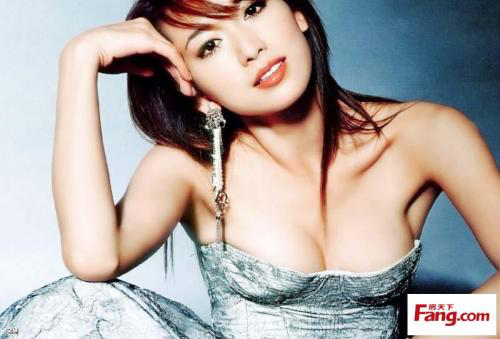

In [17]:
from PIL import Image
Image.open('1.jpg')

In [ ]:
#http://image.baidu.com/search/acjson?tn=resultjson_com&ipn=rj&ct=201326592&is=&fp=result&queryWord+=&cl=2&lm=-1&ie=utf-8&oe=utf-8&adpicid=&st=&word=%E6%9E%97%E5%BF%97%E7%8E%B2&z=&ic=&s=&se=&tab=&width=&height=&face=&istype=&qc=&nc=1&fr=&step_word=%E6%9E%97%E5%BF%97%E7%8E%B2&pn=30&rn=30&gsm=1e&1531834338861=
#http://image.baidu.com/search/acjson?tn=resultjson_com&ipn=rj&ct=201326592&is=&fp=result&queryWord+=&cl=2&lm=-1&ie=utf-8&oe=utf-8&adpicid=&st=&word=%E6%9E%97%E5%BF%97%E7%8E%B2&z=&ic=&s=&se=&tab=&width=&height=&face=&istype=&qc=&nc=1&fr=&step_word=%E6%9E%97%E5%BF%97%E7%8E%B2&pn=60&rn=30&gsm=3c&1531834339067=

## 产生抓取连结

In [24]:
url = 'http://image.baidu.com/search/acjson?tn=resultjson_com&ipn=rj&ct=201326592&is=&fp=result&queryWord+=&cl=2&lm=-1&ie=utf-8&oe=utf-8&adpicid=&st=&word={0}&z=&ic=&s=&se=&tab=&width=&height=&face=&istype=&qc=&nc=1&fr=&step_word={0}&pn={1}&rn=30&gsm=1e&1531834338861='
from urllib import parse
k = parse.quote('范冰冰')
apiurl = url.format(k, 30)

In [27]:
res = requests.get(apiurl)
res.encoding = 'utf-8'
#res.json()

## 使用网络爬虫抓取明星图片

In [30]:
import requests, os
from urllib import parse
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36'}
img_url = 'http://image.baidu.com/search/acjson?tn=resultjson_com&ipn=rj&is=&fp=result&word={0}&step_word={0}&pn={1}'

def getIdolPicture(keyword, dest_dir, batch):
    if not os.path.exists(dest_dir):
        os.mkdir(dest_dir)
    for i in range(batch):
        res = requests.get(img_url.format(parse.quote(keyword), i * 30))
        res.encoding = 'utf-8'
        print(len(res.json()['data']))
        for ele in res.json()['data']:
            url = ele.get('thumbURL')
            if url:
                with open(dest_dir + url.split('/')[-1], 'wb') as f:
                    res2 = requests.get(url, headers = headers)
                    f.write(res2.content)

In [37]:

getIdolPicture('范冰冰','test/', 1)

31


In [38]:
%ls 'test/'

u=1253325009,3060576234&fm=27&gp=0.jpg  u=317120065,604945478&fm=27&gp=0.jpg
u=1272727955,2808456323&fm=27&gp=0.jpg  u=3255906725,2565409217&fm=27&gp=0.jpg
u=1307243152,511797106&fm=27&gp=0.jpg   u=3292007549,575308843&fm=27&gp=0.jpg
u=1368851336,3679651308&fm=27&gp=0.jpg  u=3428120747,2438473576&fm=27&gp=0.jpg
u=1403507792,1607048127&fm=27&gp=0.jpg  u=348496764,168513804&fm=27&gp=0.jpg
u=1975322317,4293290386&fm=27&gp=0.jpg  u=3489619384,2530103060&fm=27&gp=0.jpg
u=2018888074,3946345716&fm=27&gp=0.jpg  u=3503469303,3613204703&fm=27&gp=0.jpg
u=2280672696,21687506&fm=27&gp=0.jpg    u=3568548935,2837212673&fm=27&gp=0.jpg
u=2435202288,812889936&fm=27&gp=0.jpg   u=3720685320,3325994284&fm=27&gp=0.jpg
u=2489421844,1036451924&fm=27&gp=0.jpg  u=3871813154,1041061679&fm=27&gp=0.jpg
u=2566339983,85740535&fm=27&gp=0.jpg    u=4037706002,51510812&fm=27&gp=0.jpg
u=2643084993,2693459637&fm=27&gp=0.jpg  u=756781385,86675949&fm=27&gp=0.jpg
u=283702151,3548867395&fm=27&gp=0.jpg   u=78277265,662571810&f

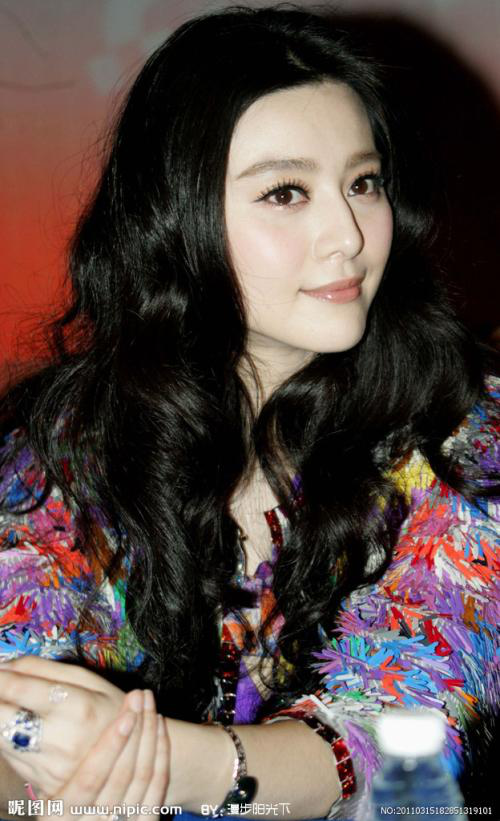

In [39]:
from PIL import Image
Image.open('test/u=1253325009,3060576234&fm=27&gp=0.jpg')